In [1]:
%pylab inline
import matplotlib.pyplot as plt
from foof import syn
from foof.fit import FOOF
import numpy as np
import os
import scipy.io
import scipy.signal
import pandas as pd
import bisect
from foof import syn
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


Paths and Data

68


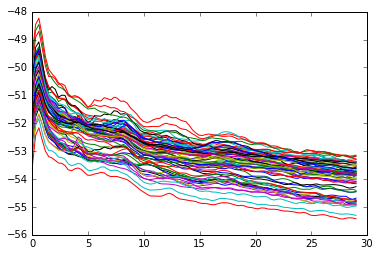

In [8]:
p = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Scout_0-500Hz.mat'
scout_dat = scipy.io.loadmat(p)
freqs = np.squeeze(scout_dat['Freqs'])
scout_psds = np.squeeze(scout_dat['TF'])
print len(scout_psds)
for x in scout_psds:
    plt.plot(freqs[0:100],np.log(x[0:100]))

In [3]:
p2 = '/Users/Torben/Documents/nsaba_foof/Scout_Vertex_Details.mat'
scout_to_vert = scipy.io.loadmat(p2)
center_inds = scout_to_vert['scout_cent']
print len(center_inds)

68


In [4]:
p3 = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Vertex_0-500Hz.mat'
vert_dat = scipy.io.loadmat(p3)
print vert_dat['TF'].shape
freqs = np.squeeze(vert_dat['Freqs'])
vert_psds = np.squeeze(vert_dat['TF'])

(15002, 1, 1707)


In [5]:
p4 = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Sensor_0-500Hz.mat'
sensor_dat = scipy.io.loadmat(p4)
sensor_psds = np.squeeze(sensor_dat['TF'])
print len(sensor_psds)

272


PSDs from vertices at the middle of each scout

In [6]:
vert_at_scouts = vert_psds[center_inds]
vert_at_scouts = np.squeeze(vert_at_scouts)

Plotting some PSDs for visual inspection

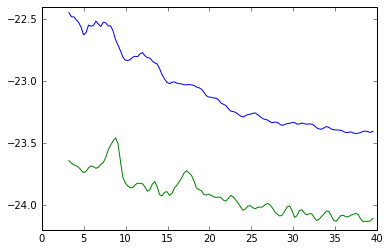

In [7]:
ind = 13
these_inds = range(bisect.bisect(freqs,3),bisect.bisect(freqs,40)-1)
plt.plot(freqs[these_inds],np.log10(scout_psds[ind][these_inds]))
plt.plot(freqs[these_inds],np.log10(vert_at_scouts[ind][these_inds]))

Calculating Center Frequencies and Slopes using FOOF

In [8]:
scout_cfs = [];
scout_chi = [];

for x in xrange(len(scout_psds)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(scout_psds[x,these_inds].T,axis=1)
    foof.model(freqs[these_inds],temp_psd)
    scout_cfs.extend(foof.centers_)
    scout_chi.append(foof.chi_)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [9]:
vert_cfs = [];
vert_chi = [];
for x in xrange(len(vert_at_scouts)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(vert_at_scouts[x,these_inds].T,axis=1)
    foof.model(freqs[these_inds],temp_psd)
    vert_cfs.extend(foof.centers_)
    vert_chi.append(foof.chi_)

In [10]:
sensor_cfs = [];
sensor_chi = [];
for x in xrange(len(sensor_psds)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(sensor_psds[x,these_inds].T,axis=1)
    foof.model(freqs[these_inds],temp_psd)
    sensor_cfs.extend(foof.centers_)
    sensor_chi.append(foof.chi_)

KeyboardInterrupt: 

Results of FOOFing different kinds of data

In [ ]:
plt.hist(scout_chi,20,alpha=0.5,label='Scout')
plt.hist(vert_chi,20,alpha = 0.5,label='Vertex')
plt.legend()
plt.title('Slopes of PSDs found by FOOF in Scouts and Vertices')
plt.xlabel('Chi Parameter (Slope)')
print scipy.stats.ttest_ind(scout_chi,vert_chi)

In [ ]:
plt.hist(scout_cfs,20,alpha=0.5,label = 'Scout')
plt.hist(vert_cfs,20,alpha = 0.5,label = 'Vertex')
plt.legend()
plt.title('Center Frequencies of PSDs found by FOOF in Scouts and Vertices')
plt.xlabel('Center Frequencies of Identified Peaks')
print scipy.stats.ttest_ind(scout_cfs,vert_cfs)

In [ ]:
plt.hist(scout_chi,20,alpha=0.5,label='Scout')
plt.hist(vert_chi,20,alpha = 0.5,label='Vertex')
plt.hist(sensor_chi,25,alpha = 0.5,label='Sensor')

plt.legend()
plt.title('Slopes of PSDs found by FOOF')
plt.xlabel('Chi Parameter (Slope)')
print 'ttest between scout chi and sensor chi '+ str(scipy.stats.ttest_ind(scout_chi,sensor_chi))
print 'ttest between vertex chi and sensor chi '+ str(scipy.stats.ttest_ind(vert_chi,sensor_chi))

In [ ]:
plt.hist(scout_cfs,20,alpha=0.5,label='Scout')
plt.hist(vert_cfs,20,alpha = 0.5,label='Vertex')
plt.hist(sensor_cfs,25,alpha = 0.5,label='Sensor')

plt.legend()
plt.title('CFs of PSDs found by FOOF')
plt.xlabel('Center Frequencies of Identified Peaks')
print 'ttest between scout chi and sensor CFs '+ str(scipy.stats.ttest_ind(scout_cfs,sensor_cfs))
print 'ttest between vertex chi and sensor CFs '+ str(scipy.stats.ttest_ind(vert_cfs,sensor_cfs))